In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')

In [5]:
npd.node_names()

['SingleSweepStream0',
 'SingleSweep1',
 'SingleStream2',
 'ADCSnap3',
 'SingleSweepStream4',
 'SingleSweep5',
 'SingleStream6',
 'ADCSnap7',
 'SingleSweepStream8',
 'SingleSweep9',
 'SingleStream10',
 'ADCSnap11',
 'SingleSweepStream12',
 'SingleSweep13',
 'SingleStream14',
 'ADCSnap15',
 'SingleSweepStream16',
 'SingleSweep17',
 'SingleStream18',
 'ADCSnap19',
 'SingleSweepStream20',
 'SingleSweep21',
 'SingleStream22',
 'ADCSnap23',
 'SingleSweepStream24',
 'SingleSweep25',
 'SingleStream26',
 'ADCSnap27',
 'SingleSweepStream28',
 'SingleSweep29',
 'SingleStream30',
 'ADCSnap31',
 'SingleSweepStream32',
 'SingleSweep33',
 'SingleStream34',
 'ADCSnap35',
 'SingleSweepStream36',
 'SingleSweep37',
 'SingleStream38',
 'ADCSnap39',
 'SingleSweepStream40',
 'SingleSweep41',
 'SingleStream42',
 'ADCSnap43',
 'SingleSweepStream44',
 'SingleSweep45',
 'SingleStream46',
 'ADCSnap47',
 'SingleSweepStream48',
 'SingleSweep49',
 'SingleStream50',
 'ADCSnap51',
 'SingleSweepStream52',
 'SingleSwe

In [6]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [7]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(124.0, 133.0),
 (51.0, 55.0),
 (26.0, 33.0),
 (20.0, 24.0),
 (105.0, 112.0),
 (41.0, 46.0),
 (23.0, 25.0),
 (17.0, 23.0),
 (134.0, 135.0),
 (53.0, 50.0),
 (25.0, 25.0),
 (19.0, 22.0),
 (52.0, 51.0),
 (22.0, 21.0),
 (13.0, 14.0),
 (12.0, 13.0),
 (36.0, 37.0),
 (17.0, 18.0),
 (14.0, 14.0),
 (13.0, 13.0),
 (32.0, 29.0),
 (16.0, 15.0),
 (13.0, 11.0),
 (10.0, 11.0),
 (30.0, 31.0),
 (16.0, 16.0),
 (13.0, 13.0),
 (9.0, 11.0)]

In [9]:
for sss in all_sss:
    temperature.add_temperature(sss, cryostat='hpd')

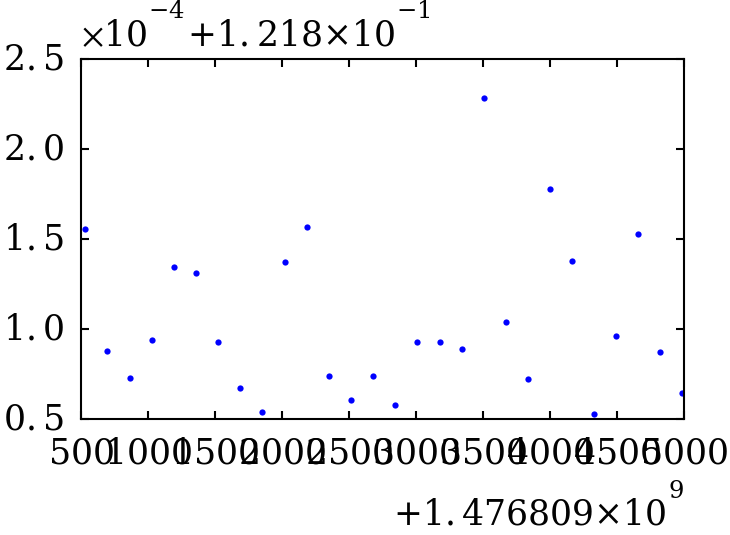

In [10]:
fig, ax = plt.subplots()
ax.plot([sss.stream.epoch for sss in all_sss],
        [sss.state.temperature.package for sss in all_sss],
        '.b')

In [11]:
df = pd.concat([sss.to_dataframe() for sss in all_sss])
np.save(npd.root_path.split('/')[-2] + '.npy', df.to_records())
df.shape

(28, 69)

In [12]:
num_channels = 7
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

In [13]:
sss_dict

{0: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3c06400690>,
 1: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf81a2d50>,
 2: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf7dd28d0>,
 3: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf7a5c450>,
 4: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf7722150>,
 5: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf63cab10>,
 6: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf5fe6690>,
  <kid_readout.measurement.basic.SingleSweepStream at 0x7f3bf5d89a90>]}

Qi: 90029; Qc: 19794
Qi: 89369; Qc: 19794
Qi: 87956; Qc: 19817
Qi: 85036; Qc: 19879


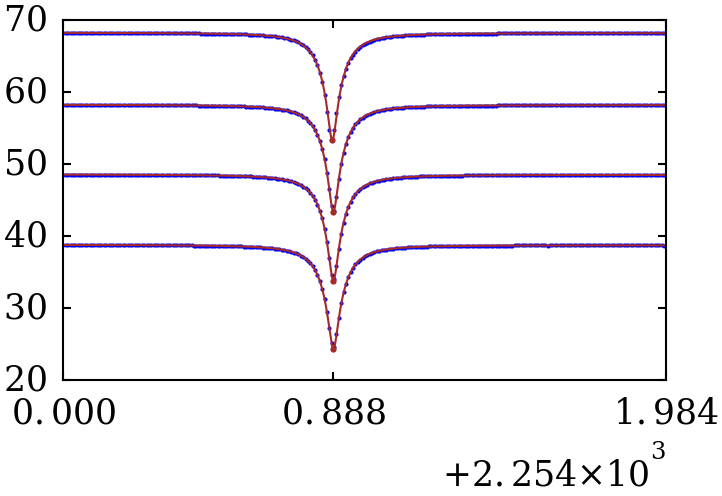

In [14]:
channel = 0
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 17838; Qc: 38190
Qi: 17805; Qc: 38364
Qi: 17686; Qc: 38328
Qi: 17543; Qc: 38478


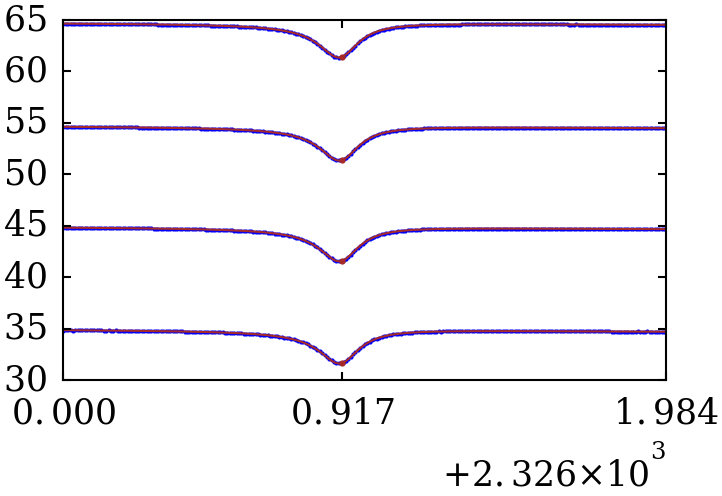

In [15]:
channel = 1
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 55234; Qc: 4003
Qi: 55732; Qc: 3937
Qi: 55218; Qc: 3914
Qi: 42144; Qc: 3734


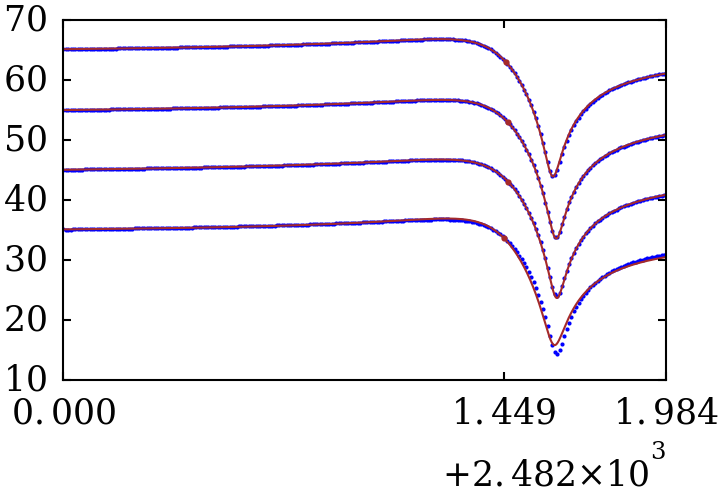

In [16]:
channel = 2
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 114543; Qc: 188038
Qi: 113983; Qc: 188642
Qi: 110199; Qc: 188961
Qi: 103306; Qc: 189431


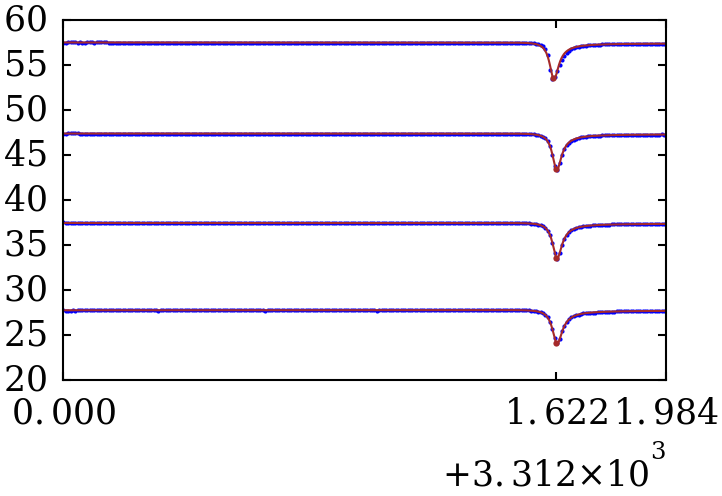

In [17]:
channel = 3
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 153330; Qc: 49694
Qi: 152528; Qc: 49967
Qi: 145828; Qc: 49906
Qi: 137765; Qc: 50011


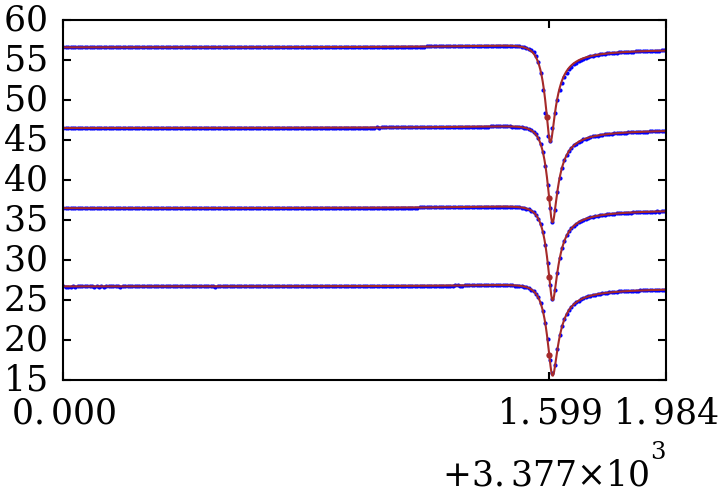

In [18]:
channel = 4
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 119727; Qc: 28097
Qi: 117304; Qc: 28179
Qi: 112374; Qc: 28385
Qi: 101403; Qc: 28730


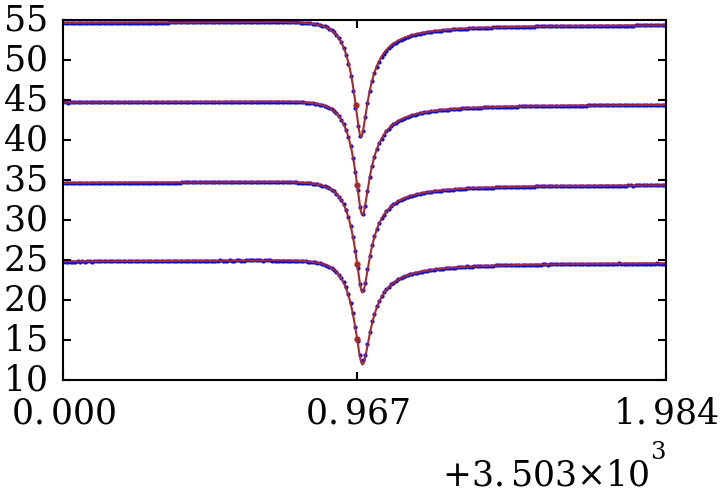

In [19]:
channel = 5
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

Qi: 73273; Qc: 28199
Qi: 72452; Qc: 28249
Qi: 69706; Qc: 28502
Qi: 63720; Qc: 29094


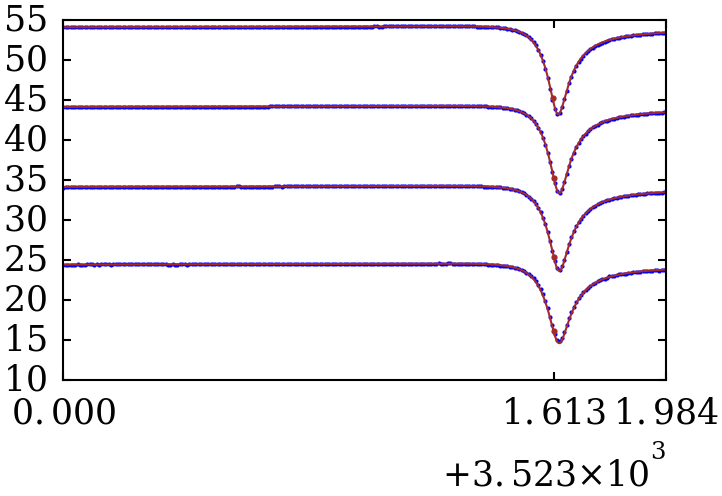

In [20]:
channel = 6
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [21]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

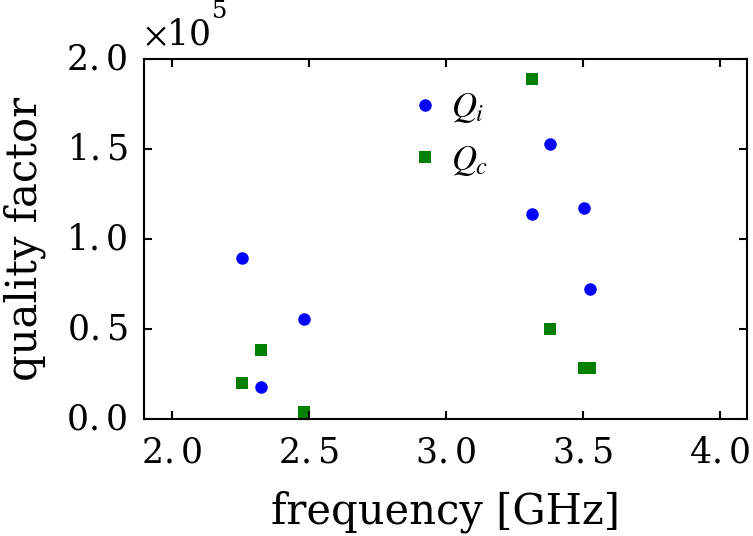

In [22]:
attenuation_index = 1
fig, ax = plt.subplots()
sssl = [sss_list[attenuation_index] for sss_list in sss_dict.values()]
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_i for sss in sssl],
        'o', color=Qi_color, label='$Q_i$')
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_e_real for sss in sssl],
        's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
ax.legend(loc='upper center', numpoints=1)
ax.set_xlim(1.9, 4.1);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_and_Qc_vs_fr.pdf')

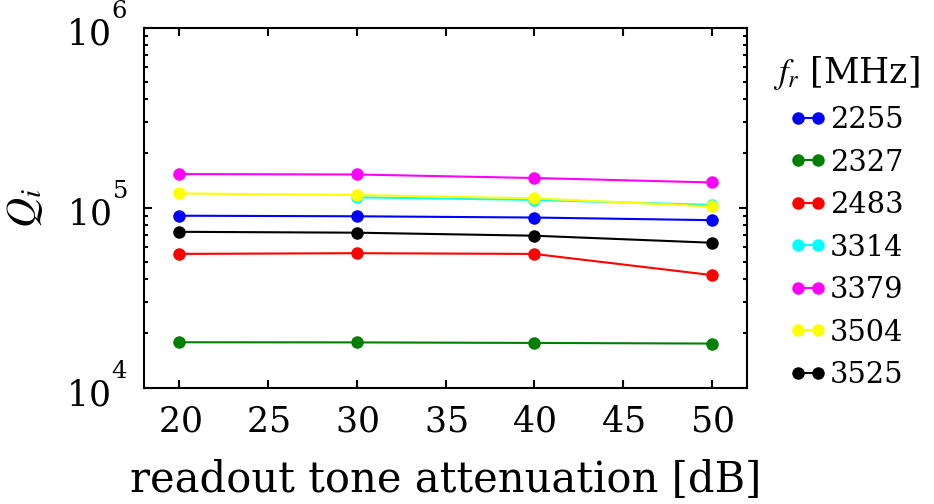

In [27]:
first_good_attenuations = 3 * [0] + [1] + 3 * [0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('$Q_i$')
ax.set_xlabel('readout tone attenuation [dB]')

for channel in range(num_channels):
    sssl = sss_dict[channel][first_good_attenuations[channel]:]
    ax.plot([sss.stream.roach_state.dac_attenuation for sss in sssl],
             [sss.resonator.Q_i for sss in sssl],
            '-', marker='o', color=colors[channel], label='{:.0f}'.format(1e-6 * sssl[-1].resonator.f_0))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_xlim(18, 52);

#fig.savefig('/home/flanigan/temp/Qi_vs_atten.pdf', bbox_inches='tight')

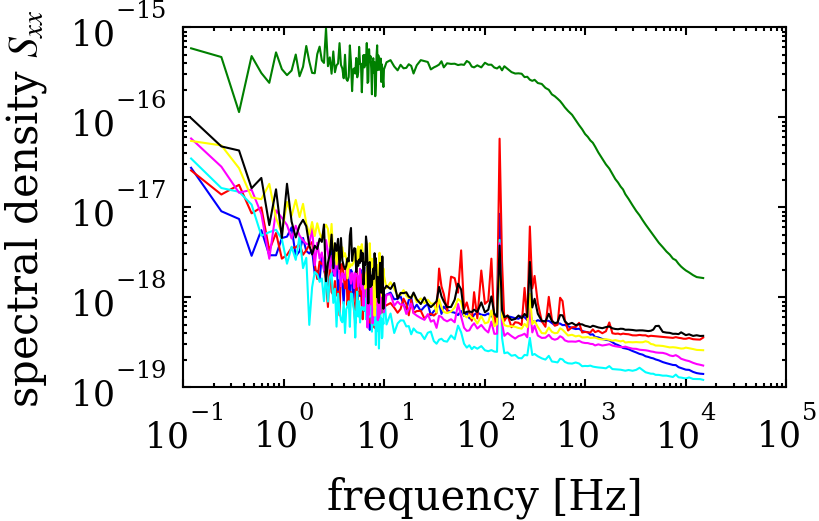

In [24]:
attenuation_index = 0

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S_{xx}$')

for channel, sssl in sss_dict.items():
    sss = sssl[attenuation_index]
    sss.set_S(binned=True)
    ax.plot(sss.S_frequency, sss.S_xx, color=colors[channel])

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_all_Sxx_vs_frequency_at_30dB.pdf', bbox_inches='tight')

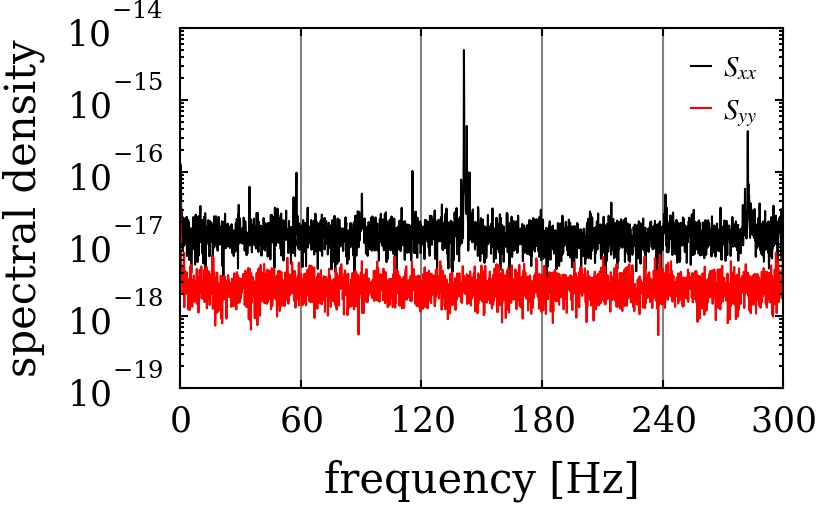

In [25]:
attenuation_index = 1
channel = 2
sss = sss_dict[channel][attenuation_index]
sss.set_S(binned=False)
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density')
ax.set_yscale('log')
ax.set_xticks([0, 60, 120, 180, 240, 300])

for f in [60, 120, 180, 240]:
    ax.axvline(f, color='gray')
ax.plot(sss.S_frequency, sss.S_xx, color='k', label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, color='r', label='$S_{yy}$')
ax.legend(loc='upper right', ncol=1, fontsize='xx-small')

ax.set_xlim(0, 300);
#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_channel_0_Sxx_Syy_vs_frequency.pdf', bbox_inches='tight')